# Chargeons en mémoire les données d'un sujet

Nous avons vu comment lire les données d'un fichier. Nous avons également vu que le script précédent est très dépendant à iPython. Nous allons ici charger les données d'un sujet en Python. L'objectif est de lire l'ensemble des données pour les concaténer.  

_Remarque Python_ : Un notebook commence toujours par les imports nécesssaires au fonctionnement du notebook !

In [ ]:
import os
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Commençons par identifier le répertoire ALL_DATA et son contenu à l'aide du module os

In [ ]:
import os
os.getcwd()

C'est en fonction de là où vous êtes que vous pourrez aller explorer le répertoire ALL_DATA. A vous d'ajouter, supprimer des `.`pour la navigation depuis ce répertoire.

In [ ]:
DATA_PATH = os.path.join('..', '..', 'data', 'ALL_DATA')
ALL_SUJETS = os.listdir(DATA_PATH)
ALL_SUJETS

Récupérons l'ensemble des contenus des sous-dossiers

In [ ]:
for root, _, files in os.walk(DATA_PATH):
    if 'sujet' in root:
        print(root)
        print(files)

Travaillons sur chaque sujet pour extraire les informations. 

_Remarque Python_ : Afin de décomposer ce qu'il doit se passer, nous allons utiliser le mécanisme qui se cache implicitement dans l'utilisation de la boucle __for__. Il s'agit de créer un intéreateur au début sur un objet itérable avec la méthode __iter__ puis à chaque appel de la méthode __next__ sur l'itérateur, nous passons à la valeur suivante dans l'objet itérable. 

In [ ]:
UN_SUJET = iter(os.walk(DATA_PATH))

Maintenant que nous disposons d'un itérateur, relancer la cellule ci-dessous permettra de changer de sujet (répertoire de sujet)

In [ ]:
while True:
    ROOT, _, FILES = next(UN_SUJET)
    if 'sujet' in ROOT:
        break
ROOT, FILES

Nous disposons maintenant du chemin au répertoire et un objet itérable qui contient le nom de l'ensemble des fichiers d'un sujet. Je vous propose de charger en mémoire le contenu de chacun de ces fichiers.

In [ ]:
# créer un itérateur UN_FICHIER
UN_FICHIER = iter(FILES)

In [ ]:
# capter un objet de l'itérable de notre itérateur (UN_ESSAI)
UN_ESSAI = next(UN_FICHIER)
UN_ESSAI

Des informations sont utiles dans le nom du fichier.

__Comment allez vous récupérer le contenu de ces informations ?__

Deux étapes :
- 1 : extraire la chaine de caractères utile (sans extension)
- 2 : utiliser l'unpacking solution en Python

In [ ]:
# extraire la chaine de caractère "FILENAME" sans l'extension "FILE_EXTENSION"
# c'est proche d'un chemin puisque c'est le nom d'un fichier. Peut-on extraire l'extension depuis le module os.path
FILENAME, FILE_EXTENSION = os.path.splitext(UN_ESSAI)
FILENAME, FILE_EXTENSION

In [ ]:
# extraire les paramètres NAME, CTRL, PHASE, CUTOFF, POURSUITE, NUMESSAI de FILENAME
NAME, CTRL, PHASE, CUTOFF, POURSUITE, NUMESSAI = FILENAME.split('_')
NAME, CTRL, PHASE, CUTOFF, POURSUITE, NUMESSAI

In [ ]:
print(NAME, CTRL, PHASE, CUTOFF, POURSUITE, NUMESSAI)
print(f'{NAME} {CTRL} {PHASE} {CUTOFF} {POURSUITE} {NUMESSAI}')
print(' '.join((NAME, CTRL, PHASE, CUTOFF, POURSUITE, NUMESSAI)))
print('{} {} {} {} {} {}'.format(NAME, CTRL, PHASE, CUTOFF, POURSUITE, NUMESSAI))

> Ces 4 lignes renvoient le même résultat affiché. Il est recommandé de vous familiairiser avec les format string `f''` ou `f""`. C'est l'outils le plus puissant pour adapter ce qui sera affiché. N'oubliez pas que print est gourmand en temps d'éxécution.

Vous pouvez le démontrer avec l'utilisation de la méthode magique %%timeit comme ci-dessous. L'exécution des cellules ci-dessous vont afficher pour de fois le résultat puis vous donner les statistiques de la durée d'exécution. Je vous encourage à utiliser l'option "Enable Scrolling for Outputs" accessible par clic-droit dans la cellule du fameux résultat.

Je vous copie/colle mes résultats :

~~~python
%%timeit  
print(NAME, CTRL, PHASE, CUTOFF, POURSUITE, NUMESSAI)  
693 µs ± 14.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

%%timeit  
print(f'{NAME} {CTRL} {PHASE} {CUTOFF} {POURSUITE} {NUMESSAI}')  
103 µs ± 2.54 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
~~~

Je peux donc considérer que je peux accélérer l'exécution de tous les appels à print en utilisant les format string.

In [ ]:
%%timeit
print(NAME, CTRL, PHASE, CUTOFF, POURSUITE, NUMESSAI)

In [ ]:
%%timeit
print(f'{NAME} {CTRL} {PHASE} {CUTOFF} {POURSUITE} {NUMESSAI}')

- Le pseudo du sujet est unique pour le sujet.
- Le type de contrôle est unique pour le sujet ('pos' ou 'vit').
- La phase de passation varie entre 'ent' pour entrainement et 'test' pour le test.
- La fréquence de coupure varie au sein des phases de passation
- Le type de suivi de cible varie au sein des phases de passation
- Le numéro d'essai lors de la passation 

In [ ]:
with open(os.path.join(ROOT, UN_ESSAI), 'r') as fnm:
    contenu = json.load(fnm)

In [ ]:
# Réaliser une introspection sur contenu pour en savoir plus de son organisation
type(contenu)

In [ ]:
contenu.keys()

Dans ces données, nous devons bien comprendre et séparer leur type. 

Nous disposons de 3 types d'informations :

- les méta-données
    - duree_essai
    - force_level
    - pv_cond
- les données brutes
    - routine_time
    - pos_ct
    - reco_data
- les données calculées
    - fb_erreur
    - percent_err

Si nous complétons avec les informations contenues dans le nom du fichier, nous obtenons :

- les méta-données
    - name (unique)
    - pv_cond ou ctrl (unique)
    - numessai
    - phase
    - cutoff
    - poursuite
    - duree_essai
    - force_level
- les données brutes
    - routine_time (temporelle)
    - pos_ct (temporelle)
    - reco_data (temporelle)
- les données calculées
    - fb_erreur (temporelle)
    - percent_err

Deux Dataframe peuvent donc être établis sur la base de ces données.

- DATA_STATIC
- DATA_TEMPO

Le Dataframe DATA_STATIC se construit selon le Dataframe DATA_TEMPO qui relate des données brutes accompagnées de variable calculée (fb_err).

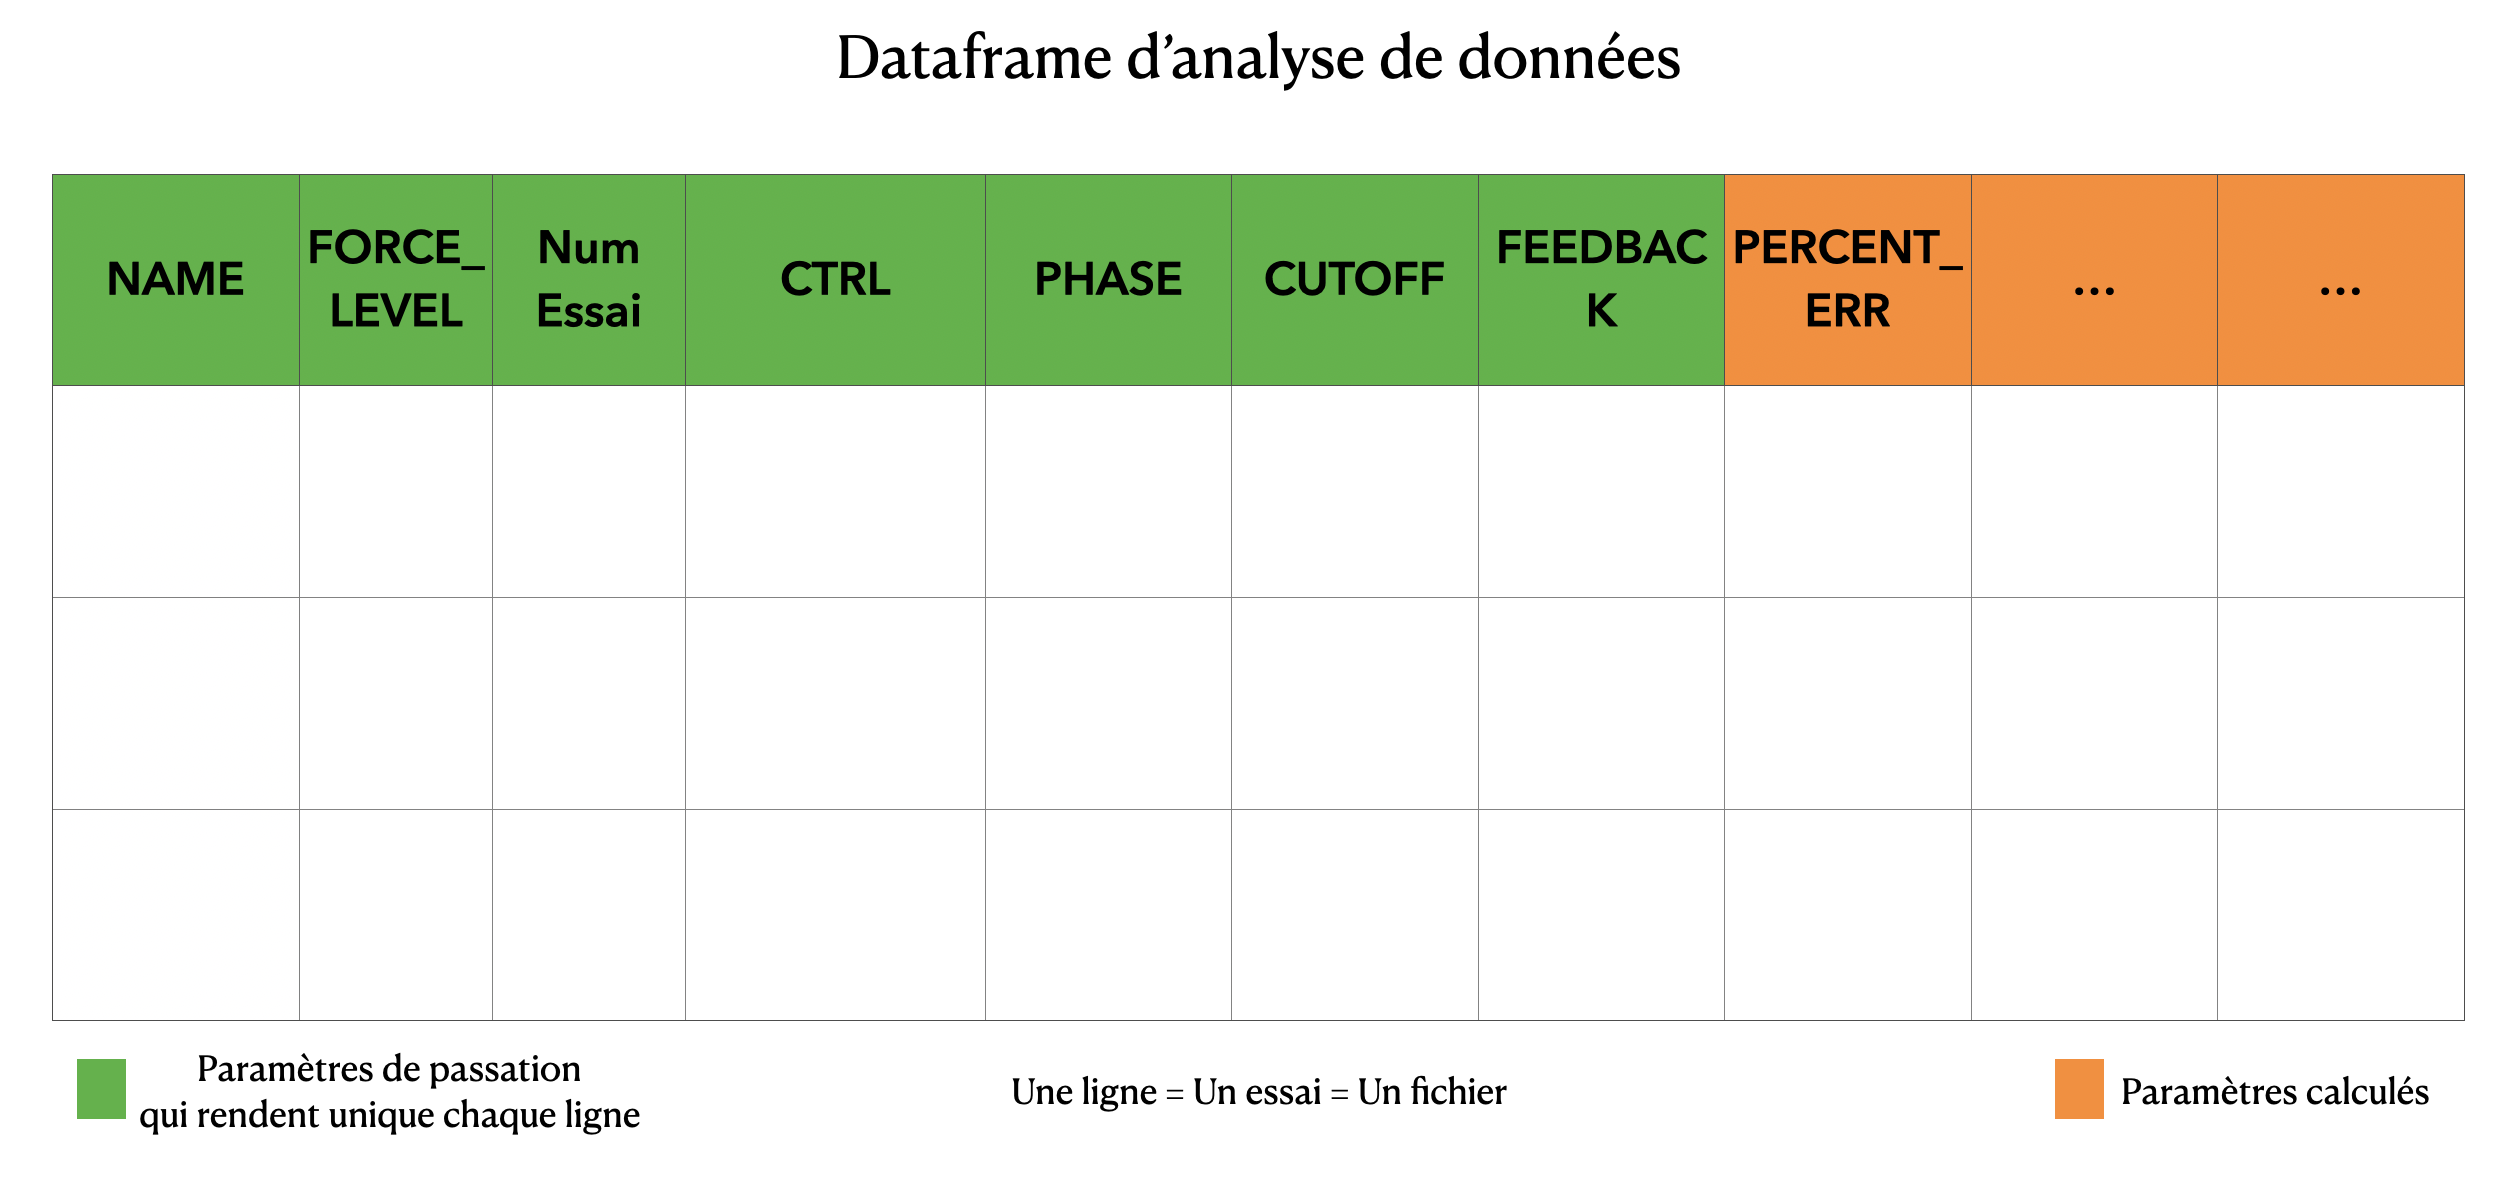

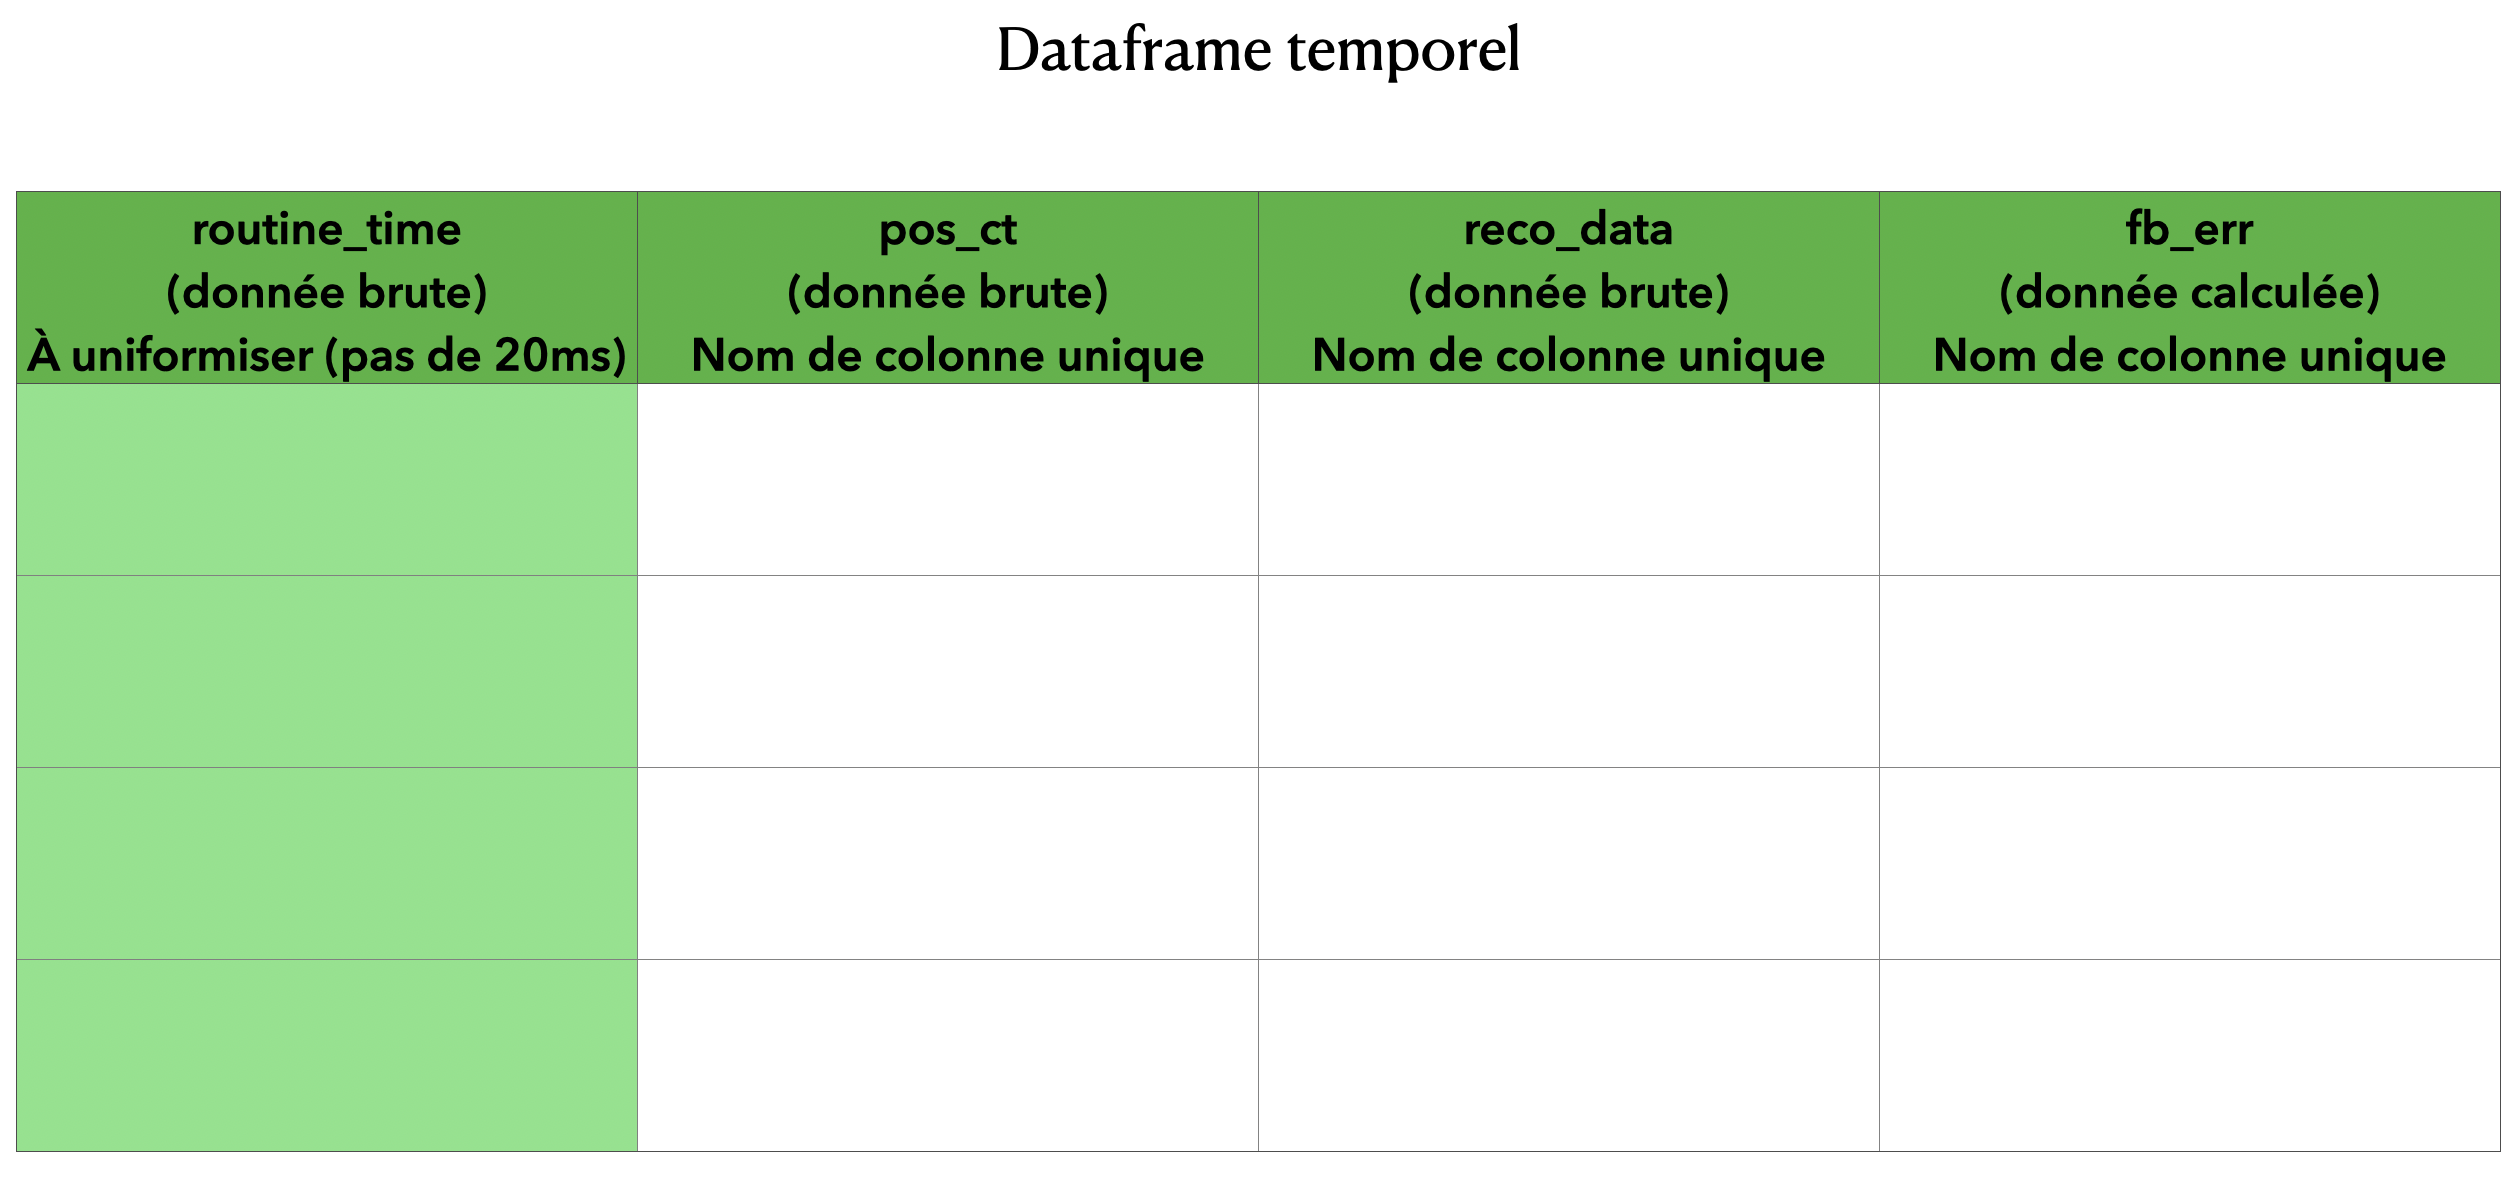

## Création de DATA_STATIC

Créez un dictionnaire qui va contenir l'ensemble des données du fichier que nous venons d'extraire et qui n'ont pas de notion temporelle.

__remarque notebook__ pour vous aider, l'appel de __whos__ vous permet de connaitre votre espace de nom

In [ ]:
whos

In [ ]:
DATA_STATIC_DICT = {'name' : [NAME],
                    'force_level' : [contenu['force_level']],
                    'num_essai' : [NUMESSAI],
                    'ctrl' : [CTRL],
                    'phase' : [PHASE],
                    'cutoff' : [CUTOFF],
                    'tracking': [POURSUITE],
                    'percent_err': [contenu['percent_err']]}
DATA_STATIC_DICT

Nous avons un grand pas puisque nous sommes maintenant arrivé à lire un fichier pour la partie non temporelle. Nous voulions nénamoins créer un DataFrame !

A vous, créez un dataframe depuis votre dictionnaire : 

In [ ]:
%%html
<iframe width='100%' height='350'
src="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html">
</iframe>

In [ ]:
DATA_STATIC = pd.DataFrame(DATA_STATIC_DICT)

In [ ]:
DATA_STATIC.head()

## Augmentation des données à travers les autres fichiers du sujet

Nous arrivons à une étape pour laquelle nous faisons de la programmation, c'est la répétition de nos erreurs, euh, notre raisonnement !

Ajoutez dans la cellule ci-dessous l'extraction d'un essai :

- 1 on itère sur notre itérateur  
- 2 on réupère le nom du fichier sans son extension  
- 3 on extrait les paramètres dcontenu dans le nom du fichier  
- 4 on charge le contenu du fichier json  

In [ ]:
UN_ESSAI = next(UN_FICHIER)
FILENAME, FILE_EXTENSION = os.path.splitext(UN_ESSAI)
NAME, CTRL, PHASE, CUTOFF, POURSUITE, NUMESSAI = FILENAME.split('_')
with open(os.path.join(ROOT, UN_ESSAI), 'r') as fnm:
    contenu = json.load(fnm)

Vous pouvez ajouter à chaque valeur de votre disctionnaire les informations extraites ci-dessus

In [ ]:
DATA_STATIC_DICT['name'].append(NAME)
DATA_STATIC_DICT['force_level'].append(contenu['force_level'])
DATA_STATIC_DICT['num_essai'].append(NUMESSAI)
DATA_STATIC_DICT['ctrl'].append(CTRL)
DATA_STATIC_DICT['phase'].append(PHASE)
DATA_STATIC_DICT['cutoff'].append(CUTOFF)
DATA_STATIC_DICT['tracking'].append(POURSUITE)
DATA_STATIC_DICT['percent_err'].append(contenu['percent_err'])

Et enfin, traduire votre dictionnaire en un dataframe

In [ ]:
DATA_STATIC = pd.DataFrame(DATA_STATIC_DICT)
DATA_STATIC.head()

Vous pouvez exécuter à plusieurs reprises les trois dernières cellules et vous verrez votre DataFrame augmenter.

## création de DATA_TEMPO

`routine_time` commence au début de la routine de l'expérience mais le sujet n'est pas encore prêt donc le début de ce tableau n'est pas à prendre en considération

`pos_ct` est initailisé avec un 0 que l'on retrouvera toujours en plus que dans `reco_data` d'où la différence constante d'une valeur.

`fb_err` est simplement la différence entre `reco_data` et `pos_ct`. On retrouve bien sur les dernières valeurs. L'enregistrement pendant l'expérience n'était pas nécessaire. 

In [ ]:
DATA_TEMPO_DICT = {'routine_time' : contenu['routine_time'],
                   'pos_ct' : contenu['pos_ct'],
                   'reco_data' : contenu['reco_data'],
                   'fb_err' : contenu['fb_err']} 

In [ ]:
DATA_TEMPO = pd.DataFrame(DATA_TEMPO_DICT)

In [ ]:
DATA_TEMPO.head()

In [ ]:
DATA_TEMPO.describe()

Nous observons que pour un fichier, `routine_time`, exprimé en seconde, ne commence pas à 0. Il indique un indice temporel dans la boucle qui a été utilisé lors de l'expérience. Il dépend de la vitesse d'exécution du code et de la vitesse de rafraichisseemnt de l'écran. Pour palier cette variabilité, il est classique de voir des expressions de routine_time en nombre de frame de l'écran.

Nous allons travailler cette variable pour mieux la comprendre et générer un index temporel pour ce Dataframe.

In [ ]:
DIFF_TIME = np.diff(DATA_TEMPO['routine_time'].values)
plt.figure(figsize=(20, 8))
plt.plot(DIFF_TIME);

La période de travail est proche de 20ms mais n'est pas stable dans le temps. Ce n'est pas un problème tant que nous en sommes conscients. 

In [ ]:
print(np.median(DIFF_TIME))
print(np.mean(DIFF_TIME))

Il faut en revanche être sûr que nous ayons la durée d'enregistrement :

In [ ]:
routine_time = DATA_TEMPO['routine_time'].values - DATA_TEMPO['routine_time'].values[0]
routine_time

Nous allons devoir revenir à un vecteur temps commun à tous nos fichiers.

Nous aimerions un vecteur temps "propre" : (0, 20, 40, ..., 150). 

__Comment feriez vous ?__

Je vous propose d'arrondir le temps à la milliseconde puis d'interpoler à la milliseconde notre signal et enfin de revenir à un échantillonnage toutes les 20ms

In [ ]:
routine_time_ar = np.round(routine_time, 3)
routine_time_ar

Appliquons notre nouveau vecteur temps comme index de notre dataframe en sépcifiant une date et une unité

In [ ]:
DATA_TEMPO.index = pd.to_datetime(routine_time_ar, origin=pd.Timestamp('2021-07-01'), unit='s')
DATA_TEMPO

Qu'observons-nous ?  
Notre vecteur temps n'est toujours pas à la ms et pourtant, nous lui avons demandé d'arrondir à 3 chiffres après la virgule !

Soit, essayons une autre méthode plus violente et que nous aurions aimé qu'il se produise si dessus !

In [ ]:
routine_time = ...
routine_time = ...
routine_time = ...
routine_time

In [ ]:
DATA_TEMPO.index = pd.to_datetime(routine_time, origin=pd.Timestamp('2021-07-01'), unit='ms')
DATA_TEMPO

C'est nettement mieux ! C'est quand même bien de valider étape par étape et de commenter ce qu'on fait avant de tout passer dans une moulinette puis debuger...

Maintenant que nous avons arondi à la milliseconde notre vecteur temps, il nous faut réaliser une interpolation à la milliseconde. C'est là où l'outils `pandas` est sympa.
Puisque notre index est temporel (datetime), nous pouvons modifier la fréquence à notre guise avec la méthode `asfreq` puis interpoler avec la méthode `ìnterpolate` et enfin, nous reviendrons à une fréquence d'index toute les 20ms !

In [ ]:
DATA_TEMPO_RES = DATA_TEMPO.asfreq(freq='1ms')

In [ ]:
DATA_TEMPO_RES['routine_time']

In [ ]:
DATA_TEMPO_RES['routine_time'] = DATA_TEMPO_RES['routine_time'].interpolate(method='linear')
DATA_TEMPO_RES

In [ ]:
DATA_TEMPO_RES = DATA_TEMPO_RES.interpolate(method='linear')
DATA_TEMPO_RES

Nous avons réussi !

Nous pouvons alors profiter pour observer la trace _pos_ct_ d'avant de maintenant et sa différence 

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(311)
DATA_TEMPO_RES['pos_ct'].plot()
plt.subplot(312)
DATA_TEMPO['pos_ct'].plot();
plt.subplot(313)
DIFF = DATA_TEMPO['pos_ct'] - DATA_TEMPO_RES['pos_ct']
DIFF = DIFF.interpolate(method='linear')
DIFF.plot();

In [ ]:
DATA_TEMPO_RES['pos_ct']

In [ ]:
DATA_TEMPO['pos_ct']

Vous pouvez maintenant revenir à une résolution temporelle toutes les 20ms.

In [ ]:
DATA_TEMPO_HOMOGENE = ...
DATA_TEMPO_HOMOGENE

Validation de la cohérence d'interpoler sur _fb_err_ ?

_fb_err_ = reco_data - _pos_ct_

Calculer _fb_err_ depuis _reco_data_ et _pos_ct_ pour voir si le résultat est conservé ? 

In [ ]:
DATA_TEMPO_HOMOGENE['reco_data'].values - DATA_TEMPO_HOMOGENE['pos_ct'].values

Nous pouvons nous demander si une interpolation linéaire est justifiée ou si un 'spline' d'ordre 2 n'aurait pas été mieux.

In [ ]:
plt.figure(figsize=(20, 8))
DATA_TEMPO_HOMOGENE['pos_ct'][-10:].plot()
DATA_TEMPO['pos_ct'][-10:].plot();

Parfait, nous avons su extraire le contenu temporel et travailler un peu les données pour les rendre homogène.

Notre Dataframe DATA_TEMPO ou DATA_TEMPO_HOMOGENE ne contient qu'un fichier. Nous ne pouvons poursuivre sans rendre unique les noms des colonnes.

In [ ]:
DATA_TEMPO_HOMOGENE.columns

In [ ]:
DATA_TEMPO_HOMOGENE = DATA_TEMPO_HOMOGENE.rename(columns={"pos_ct": f"pos_ct_{FILENAME}",
                                                          "reco_data": f"reco_data_{FILENAME}",
                                                          "fb_err": f"fb_err_{FILENAME}"})
DATA_TEMPO_HOMOGENE = DATA_TEMPO_HOMOGENE.drop(columns=['routine_time'])
DATA_TEMPO_HOMOGENE.head()

## Augmentation des données à travers les autres fichiers du sujet

Après répétition des cellules ci dessous jusqu'à STOP ITERATION qui intervient une fois que l'ensemble des fichiers ait été visité.

In [ ]:
UN_ESSAI = next(UN_FICHIER)
FILENAME, FILE_EXTENSION = os.path.splitext(UN_ESSAI)
with open(os.path.join(ROOT, UN_ESSAI), 'r') as fnm:
    contenu = json.load(fnm)

DATA_TEMPO_DICT = {'routine_time' : contenu['routine_time'],
                   'pos_ct' : contenu['pos_ct'],
                   'reco_data' : contenu['reco_data'],
                   'fb_err' : contenu['fb_err']}

DATA_TEMPO = pd.DataFrame(DATA_TEMPO_DICT)

routine_time = DATA_TEMPO['routine_time'].values - DATA_TEMPO['routine_time'].values[0]
routine_time = routine_time * 1000
routine_time = np.around(routine_time)
routine_time = routine_time.astype('int32')
DATA_TEMPO.index = pd.to_datetime(routine_time, origin=pd.Timestamp('2021-07-01'), unit='ms')
DATA_TEMPO_RES = DATA_TEMPO.asfreq(freq='1ms')
DATA_TEMPO_RES = DATA_TEMPO_RES.interpolate(method='linear')
DATA_TEMPO_HOM = DATA_TEMPO_RES.asfreq(freq='20ms')
DATA_TEMPO_HOM = DATA_TEMPO_HOM.rename(columns={"pos_ct": f"pos_ct_{FILENAME}",
                                                "reco_data": f"reco_data_{FILENAME}",
                                                "fb_err": f"fb_err_{FILENAME}"})
DATA_TEMPO_HOM = DATA_TEMPO_HOM.drop(columns=['routine_time'])

DATA_TEMPO_HOMOGENE = pd.concat([DATA_TEMPO_HOMOGENE, DATA_TEMPO_HOM], axis=1)
DATA_TEMPO_HOMOGENE.head()

Nous avons réussi à apprivoiser les données de chaque fichier et nous avons un début d'ajout pour tous les fichiers.
Nous pouvons maintenant rentrer dans le vif et réaliser un script qui nous réalisera tout ça

Lancez Spyder depuis votre environnement dédié _python_r_ depuis un terminal ou un anaconda prompt

Créer le fichier `create_dataframe.py` puis reprenez notre analyse de ce notebook afin d'automatiser toute la lecture et extraction des données.

Appliquer la méthode de documentation de scripts : https://realpython.com/documenting-python-code/

Nous ajouterons néanmoins un observateur pour cette interpolation qui est le nombre de point avant interpolation pour s'assurer que l'interpolation soit faites dans de bonnes conditions. Il ne faudrait pas que nous n'ayons que deux points pour un essai pour lequel mathématiquement notre code fonctionne mais que ça n'ait aucun sens ! Que nous enregistrerons dans un fichier _data_nb_points.csv_ 

~~~python
DATA_NB_POINTS_DICT = {'name': [name],
                       'num_essai': [num_essai],
                       'nb_points': [len(contenu['pos_ct'])]}
DATA_NB_POINTS = pd.DataFrame(DATA_NB_POINTS_DICT)
~~~

Vous enregistrerez chaque dataframe au format csv compressé par zip

C'est à vous !